In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASE = "../app/data_pipeline"

features = pd.read_csv(f"{BASE}/features_train.csv")
print(features.shape)
features.head()

(266500, 43)


,target_date,warehouse_id,store_id,sku_id,region,cat_low,actual_order_qty,lag_1,lag_2,lag_4,...,back_to_school,avg_temp_c_ma4,cdd_ma4,hdd_ma4,precip_mm_ma4,himart_sales_index_ma4,holiday_index_ma4,marketing_score_ma4,y,split
0,2016-02-29,1,1,AC-CAR-16P-2024,본사창고,에어컨,60,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,train
1,2016-03-07,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,60.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,2016-03-14,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,0.0,60.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,2016-03-21,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,2016-03-28,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [91]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [92]:
plt.rc('font', family='NanumBarunGothic')

# EDA
## 1. 타겟 분포 확인

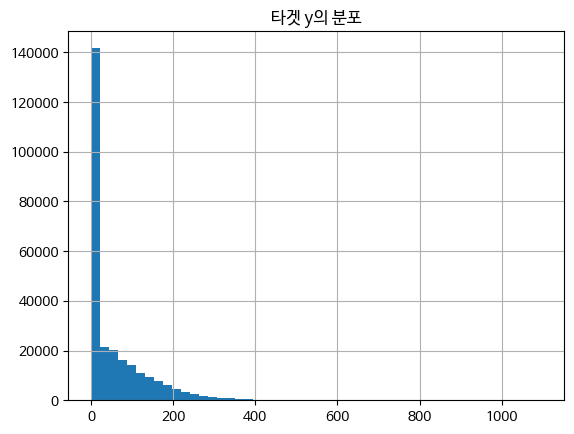

In [93]:
features["y"].hist(bins=50)
plt.title("타겟 y의 분포")
plt.show()

## 2. 기본 통계

In [94]:
features["y"].describe()

count    266500.000000
mean         57.265831
std          91.376801
min           0.000000
25%           0.000000
50%           0.000000
75%          89.000000
max        1098.000000
Name: y, dtype: float64

median(50%) = 0, 75% = 89, max = 1098  
-> 거의 절반 이상의 주차가 판매 0. 나머지는 오른쪽으로 긴 꼬리가 있는 heavy right tail 분포  
: 0이 엄청 많고 일부 SKU가 크게 팔리는 구조. 전형적인 리테일/재고 데이터 모습  
: MAE 기준으로 보면 큰 수요가 있는 주차가 훨씬 더 영향을 많이 줌

## 3. 카테고리/sku별 판매량

In [95]:
features.columns.tolist()

['target_date',
 'warehouse_id',
 'store_id',
 'sku_id',
 'region',
 'actual_order_qty',
 'lag_1',
 'lag_2',
 'lag_4',
 'lag_8',
 'lag_12',
 'ma_4',
 'ma_8',
 'ma_12',
 'share_norm',
 'promo_flag',
 'year',
 'weekofyear',
 'month',
 'sin_week',
 'cos_week',
 'avg_temp_c',
 'cdd',
 'hdd',
 'precip_mm',
 'heat_wave',
 'cold_wave',
 'himart_sales_krw',
 'himart_sales_index',
 'holiday_index',
 'marketing_score',
 'seasonal_peak',
 'back_to_school',
 'avg_temp_c_ma4',
 'cdd_ma4',
 'hdd_ma4',
 'precip_mm_ma4',
 'himart_sales_index_ma4',
 'holiday_index_ma4',
 'marketing_score_ma4',
 'y',
 'split']

In [96]:
import pandas as pd
BASE = "../app/data_pipeline"
sku = pd.read_csv(f"{BASE}/sku_catalog.csv")

sku = sku[['sku_id', 'cat_low']] 

features_merged = features.merge(sku, on='sku_id', how='left')
features_merged.groupby("cat_low")["y"].sum().sort_values(ascending=False).head(20)


cat_low
데스크탑     1247196.0
믹서기      1194356.0
스마트워치    1193706.0
전자레인지    1089324.0
식기세척기    1036365.0
토스터기      986660.0
커피머신      986093.0
노트북       831330.0
냉장고       830169.0
공기청정기     829390.0
에어컨       828967.0
오븐        728422.0
라우터       673316.0
프린터       571376.0
세탁기       519061.0
스마트폰      468059.0
모니터       363387.0
건조기       312677.0
TV        311730.0
청소기       259760.0
Name: y, dtype: float64

어떤 카테고리/상품이 수요예측에서 중요한지.  

## 4. 날짜·주차별 패턴

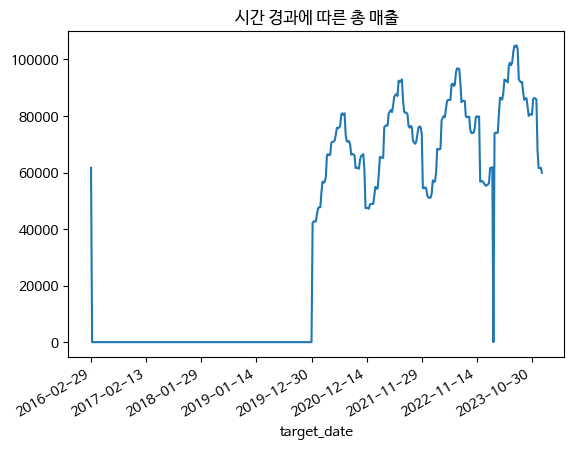

In [97]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
features.groupby("target_date")["y"].sum().plot(ax=ax)
plt.title("시간 경과에 따른 총 매출")

fig.autofmt_xdate() 
plt.show()


연도별로 계절 패턴이 보임  
-> 주간 수요예측 모델이 시즌성을 잘 잡아야함

## 5. 외부 요인 영향

In [98]:
cols = ["avg_temp_c", "holiday_index", "promo_flag"]  
features[cols + ["y"]].corr()


,avg_temp_c,holiday_index,promo_flag,y
avg_temp_c,1.000000,0.032033,0.385128,0.462669
holiday_index,0.032033,1.000000,0.172706,0.113058
promo_flag,0.385128,0.172706,1.000000,0.683901
y,0.462669,0.113058,0.683901,1.000000


프로모션, 기온은 수요에 큰 영향 줌. -> 피쳐로 유지  
완벽히 선형 관계는 아님. -> 트리계열 모델 사용해서 이런 패턴 잡아주기   
상관계수 낮아도 트리 기반 모델은 비선형 관계 잘 잡음

## 6.타깃 로그 변환 분포 확인

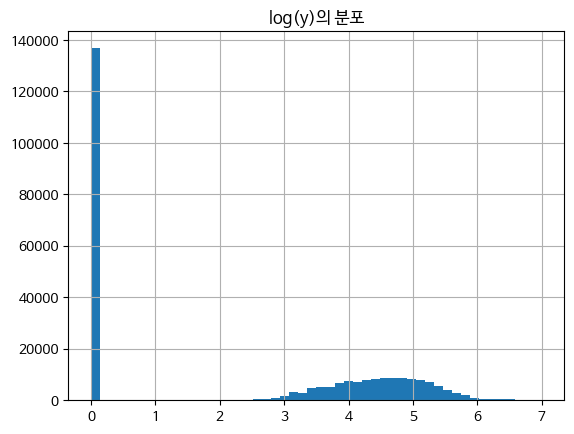

In [99]:
features["log_y"] = np.log1p(features["y"])
features["log_y"].hist(bins=50)
plt.title("log(y)의 분포")
plt.show()

0인 값이 많음 == 판매가 0인 주차가 많음.  
로그를 써서 큰 값 쪽 꼬리는 완화했지만 0값에 대해서는 따로 접근해야할수도 있음 

## 7. Lag Feature 상관분석  
Lag : 시차 변수. 과거 시점의 값을 그대로 가져와서 새로운 변수로 사용하는 것.

In [100]:
lag_cols = ["lag_1","lag_2","lag_4","lag_8","lag_12"]
features[lag_cols + ["y"]].corr()


,lag_1,lag_2,lag_4,lag_8,lag_12,y
lag_1,1.000000,0.982528,0.968793,0.941425,0.913102,0.982557
lag_2,0.982528,1.000000,0.975657,0.948364,0.920790,0.975751
lag_4,0.968793,0.975657,1.000000,0.963253,0.936858,0.962365
lag_8,0.941425,0.948364,0.963253,1.000000,0.965848,0.934616
lag_12,0.913102,0.920790,0.936858,0.965848,1.000000,0.905428
y,0.982557,0.975751,0.962365,0.934616,0.905428,1.000000


## 8. MA Feature 상관분석  
MA : 이동 평균. 일정 기간 동안의 평균값을 굴러가며 계산하는 것.

In [101]:
ma_cols = ["ma_4","ma_8","ma_12"]
features[ma_cols + ["y"]].corr()

,ma_4,ma_8,ma_12,y
ma_4,1.000000,0.994572,0.986542,0.978779
ma_8,0.994572,1.000000,0.996713,0.969684
ma_12,0.986542,0.996713,1.000000,0.959952
y,0.978779,0.969684,0.959952,1.000000


lag_* 와 y 상관이 0.93~0.98 수준, ma_*도 비슷하게 높음  
-> 바로 전/이전 주 수요가 현재 주 수요를 거의 직접적으로 설명.

## 9. 외부 요인 히트맵

In [102]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

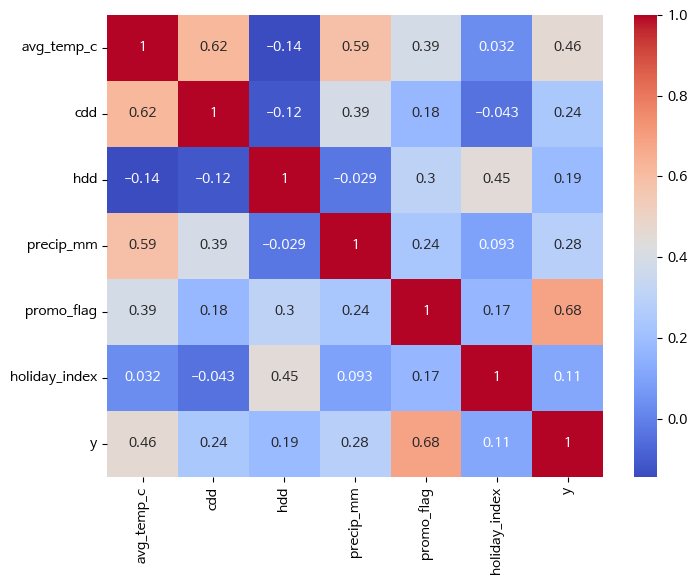

In [103]:
import seaborn as sns
plt.figure(figsize=(8,6))
cols = ["avg_temp_c","cdd","hdd","precip_mm","promo_flag","holiday_index"]
sns.heatmap(features[cols + ["y"]].corr(), annot=True, cmap="coolwarm")

## 10. SKU Sales profile

In [104]:
features.groupby("sku_id")["y"].sum().sort_values(ascending=False).head(20)

sku_id
MIX-CUI-HAND-2024         1194356.0
WAT-APL-AW-41-2024         598536.0
WAT-SAM-GAL-45-2024        595170.0
TOA-BRN-2S-2024            493330.0
TOA-PHI-2S-2024            493330.0
DES-HP-STD-2024            428326.0
MW-SAM-30L-2024            417011.0
DW-SAM-12P-2024            414531.0
DES-LEN-THINK-2024         413136.0
DES-SAM-STD-2024           405734.0
MW-LG-25L-2024             364845.0
DW-LG-12P-2024             362718.0
COF-BRV-SEMI-2024          332888.0
AIR-LG-PURI-58-2024        331827.0
AC-LG-STAND-18P-2024       331679.0
COF-NES-CAPS-2024          329831.0
OV-LG-70L-2024             327825.0
COF-DEL-AUTO-2024          323374.0
NBK-SAM-GALAXY-15-2024     281452.0
NBK-LG-GRAM-16-2024        275897.0
Name: y, dtype: float64

## 11. Feature Importance
데이터 일부만 이용해서 대략적인 feature 영향도 먼저 확인  
LightGBM로 미리 확인

In [105]:
from lightgbm import LGBMRegressor
train = features[features["split"] == "train"].copy()

y = train["y"]

ignore = [
    "warehouse_id", "store_id", "sku_id", "region",
    "target_date", "split", "y",
]

X = train.drop(columns=ignore, errors="ignore")

numeric_cols = X.select_dtypes(include=["number", "bool"]).columns
X = X[numeric_cols]

from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=42)
model.fit(X, y)

importances = (
    pd.Series(model.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
)
importances.head(20)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4150
[LightGBM] [Info] Number of data points in the train set: 266500, number of used features: 36
[LightGBM] [Info] Start training from score 57.265831


actual_order_qty          1305
lag_12                     162
lag_4                      137
lag_1                      130
lag_2                      126
lag_8                      122
marketing_score_ma4         99
marketing_score             92
precip_mm                   90
weekofyear                  88
precip_mm_ma4               84
avg_temp_c_ma4              71
avg_temp_c                  69
sin_week                    63
cos_week                    44
ma_4                        43
himart_sales_index_ma4      37
ma_12                       30
share_norm                  28
himart_sales_krw            27
dtype: int32

## 12. SKU별 수요 패턴 시각화
SKU마다 수요 패턴이 크게 다를 수 있으므로(시즌형, 안정형, 변동 폭주형 등),     
샘플 SKU를 몇 개 골라서 수요 변화 추이를 확인   
-> SKU별 이질성을 얼마나 잘 학습해야 하는지 판단하는 데 도움

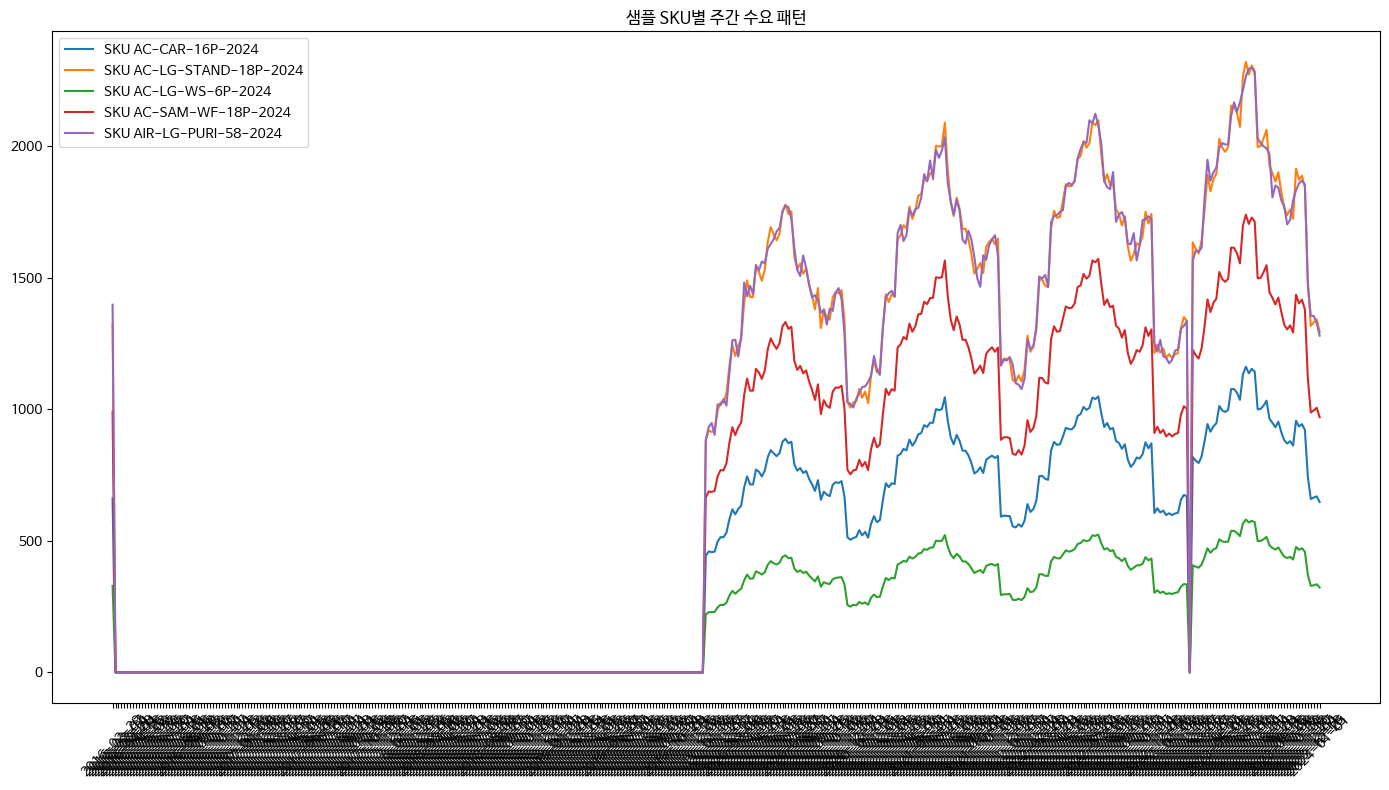

In [134]:
# 임의 SKU 5개 샘플 추출
sample_skus = features["sku_id"].dropna().unique()[:5]

plt.figure(figsize=(14, 8))
for sku in sample_skus:
    subset = features[(features["sku_id"] == sku) & (features["split"] == "train")]

    subset_group = subset.groupby("target_date")["y"].sum()

    plt.plot(subset_group.index, subset_group.values, label=f"SKU {sku}")

plt.title("샘플 SKU별 주간 수요 패턴")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 13. Lag 피처 vs Target Cross-Correlation
lag 값이 몇 주까지 유효한지 확인 -> lag 범위 확장/축소 근거 제공

In [107]:
!pip install statsmodels


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


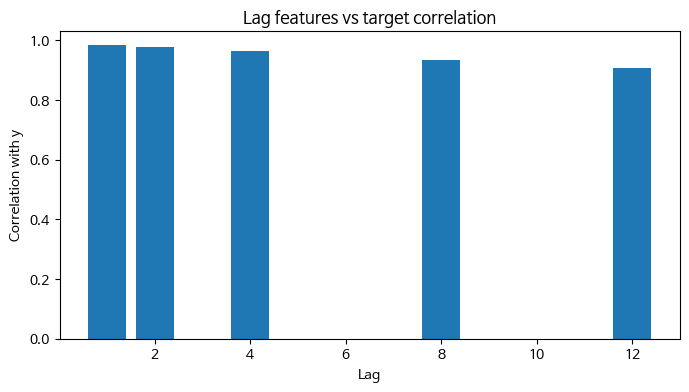

In [108]:
from statsmodels.tsa.stattools import ccf

train = features[features["split"] == "train"].copy()

lags = [1, 2, 4, 8, 12]

corrs = []
for lag in lags:
    corr = train["y"].corr(train[f"lag_{lag}"])
    corrs.append(corr)

plt.figure(figsize=(8, 4))
plt.bar(lags, corrs)
plt.xlabel("Lag")
plt.ylabel("Correlation with y")
plt.title("Lag features vs target correlation")
plt.show()


## 14. 프로모션/휴일 효과 Boxplot
프로모션·휴일 등의 외부 요인이 실제로 수요량을 변화시키는지 유의한 근거 확보

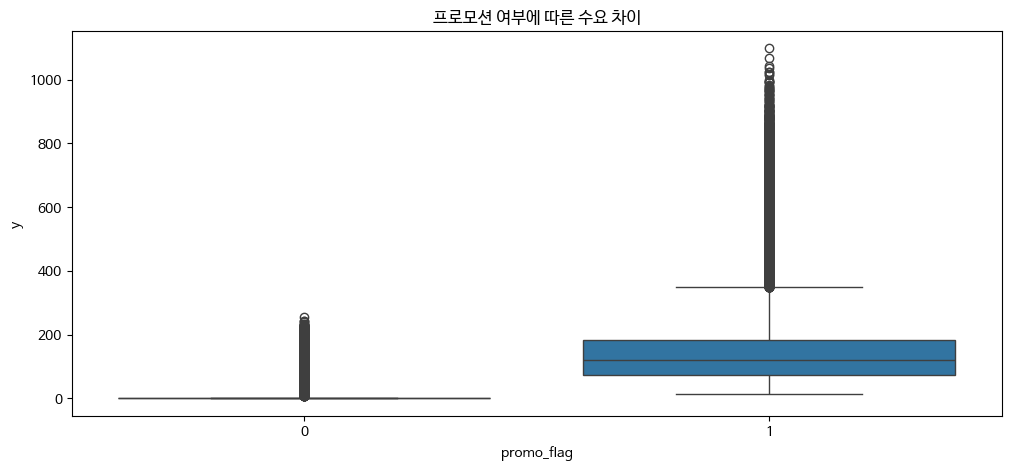

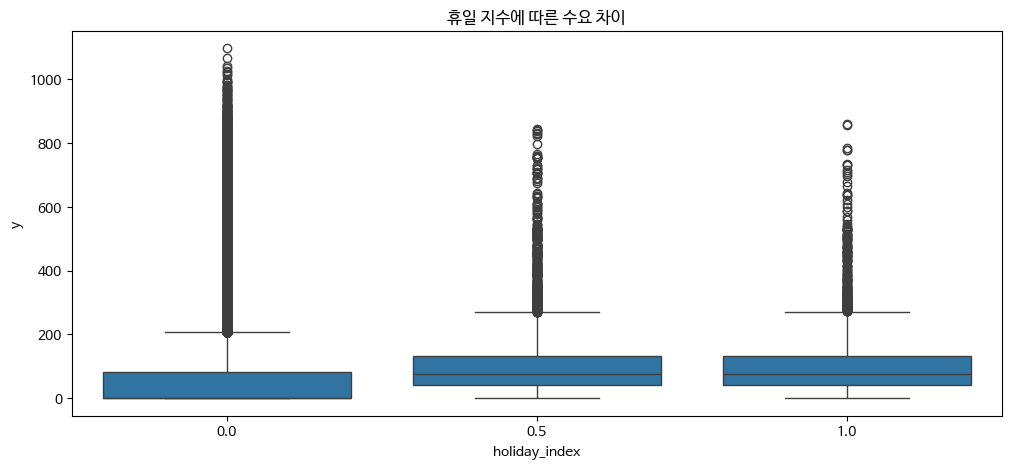

In [109]:
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.boxplot(x="promo_flag", y="y", data=train)
plt.title("프로모션 여부에 따른 수요 차이")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="holiday_index", y="y", data=train)
plt.title("휴일 지수에 따른 수요 차이")
plt.show()


## 15. 결측치 히트맵
외부요인/lag/MA 피처 중 결측치 비율이 높은 항목이 있는지 확인

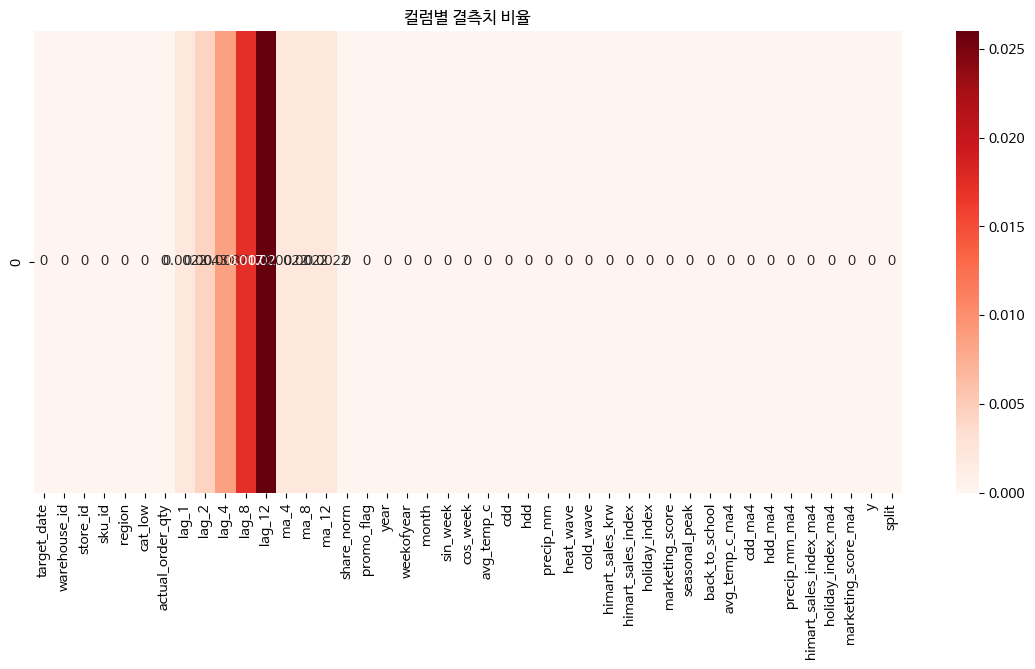

In [130]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.heatmap(features.isnull().mean().to_frame().T, cmap="Reds", annot=True)
plt.title("컬럼별 결측치 비율")
plt.show()


## 16. 카테고리별 평균 수요 비교
카테고리별 기본 수요 수준 차이를 확인 -> target encoding/one-hot 전략 근거

In [123]:
from pathlib import Path
import pandas as pd

BASE = Path("../app/data_pipeline").resolve()

print(">>> LOADING FROM:", BASE / "features_all.csv")
df = pd.read_csv(BASE / "features_all.csv")

print(df.shape)
df.head()


>>> LOADING FROM: C:\Users\chosw\ORDER101_SMART_ORDERRR\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\features_all.csv
(300300, 43)


,target_date,warehouse_id,store_id,sku_id,region,cat_low,actual_order_qty,lag_1,lag_2,lag_4,...,back_to_school,avg_temp_c_ma4,cdd_ma4,hdd_ma4,precip_mm_ma4,himart_sales_index_ma4,holiday_index_ma4,marketing_score_ma4,y,split
0,2016-02-29,1,1,AC-CAR-16P-2024,본사창고,에어컨,60,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,train
1,2016-03-07,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,60.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,2016-03-14,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,0.0,60.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,2016-03-21,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,2016-03-28,1,1,AC-CAR-16P-2024,본사창고,에어컨,0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [127]:
# 전체 데이터
features = df.copy()

# 학습용(숫자 전용) 데이터
train = features[features["split"] == "train"].copy()
numeric_cols = train.select_dtypes(include=["number", "bool"]).columns
train_numeric = train[numeric_cols]


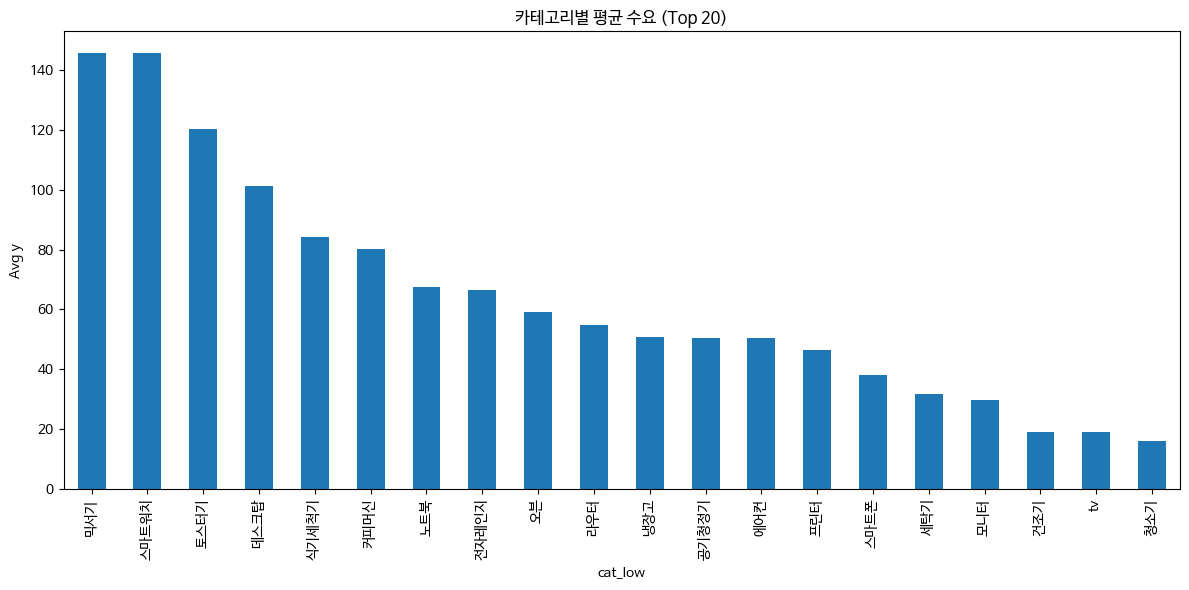

In [128]:
train_cat = features[features["split"] == "train"].copy()

cat_mean = (
    train_cat
      .groupby("cat_low")["y"]
      .mean()
      .sort_values(ascending=False)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
cat_mean.head(20).plot(kind="bar")
plt.title("카테고리별 평균 수요 (Top 20)")
plt.ylabel("Avg y")
plt.tight_layout()
plt.show()


In [129]:
features.columns


Index(['target_date', 'warehouse_id', 'store_id', 'sku_id', 'region',
       'cat_low', 'actual_order_qty', 'lag_1', 'lag_2', 'lag_4', 'lag_8',
       'lag_12', 'ma_4', 'ma_8', 'ma_12', 'share_norm', 'promo_flag', 'year',
       'weekofyear', 'month', 'sin_week', 'cos_week', 'avg_temp_c', 'cdd',
       'hdd', 'precip_mm', 'heat_wave', 'cold_wave', 'himart_sales_krw',
       'himart_sales_index', 'holiday_index', 'marketing_score',
       'seasonal_peak', 'back_to_school', 'avg_temp_c_ma4', 'cdd_ma4',
       'hdd_ma4', 'precip_mm_ma4', 'himart_sales_index_ma4',
       'holiday_index_ma4', 'marketing_score_ma4', 'y', 'split'],
      dtype='object')

In [113]:
BASE = "../app/data_pipeline"

train = pd.read_csv(f"{BASE}/features_train.csv")
test  = pd.read_csv(f"{BASE}/features_test.csv")

train["split"] = "train"
test["split"]  = "test"

features = pd.concat([train, test], ignore_index=True)

print("train:", train.shape, "test:", test.shape, "all:", features.shape)
features.head()

train: (266500, 42) test: (33800, 42) all: (300300, 42)


,target_date,warehouse_id,store_id,sku_id,region,actual_order_qty,lag_1,lag_2,lag_4,lag_8,...,back_to_school,avg_temp_c_ma4,cdd_ma4,hdd_ma4,precip_mm_ma4,himart_sales_index_ma4,holiday_index_ma4,marketing_score_ma4,y,split
0,2016-02-29,1,1,AC-CAR-16P-2024,본사창고,60,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,train
1,2016-03-07,1,1,AC-CAR-16P-2024,본사창고,0,60.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,2016-03-14,1,1,AC-CAR-16P-2024,본사창고,0,0.0,60.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,2016-03-21,1,1,AC-CAR-16P-2024,본사창고,0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,2016-03-28,1,1,AC-CAR-16P-2024,본사창고,0,0.0,0.0,60.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [114]:
train = features[features["split"] == "train"].copy()
test  = features[features["split"] == "test"].copy()

ignore = ["warehouse_id","store_id","sku_id","region","target_date","split","y"]
X_train = train.drop(columns=ignore, errors="ignore")
X_test  = test.drop(columns=ignore, errors="ignore")

num_cols = X_train.select_dtypes(include=["number","bool"]).columns
X_train = X_train[num_cols]
X_test  = X_test[num_cols]

y_train = train["y"]
y_test  = test["y"]


In [115]:
print("train:", train.shape, "test:", test.shape, "all:", features.shape)

train: (266500, 42) test: (33800, 42) all: (300300, 42)


# Baseline Modeling
## 1. Baseline MAE

In [116]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

train = features[features["split"] == "train"].copy()
test  = features[features["split"] == "test"].copy()

ignore = [
    "warehouse_id", "store_id", "sku_id", "region",
    "target_date", "split", "y",
]

X_train = train.drop(columns=ignore, errors="ignore")
X_test  = test.drop(columns=ignore, errors="ignore")

num_cols = X_train.select_dtypes(include=["number", "bool"]).columns
X_train = X_train[num_cols]
X_test  = X_test[num_cols]

y_train = train["y"].astype(float)
y_test  = test["y"].astype(float)

print("X_train:", X_train.shape, "X_test:", X_test.shape)

model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

model.fit(X_train, y_train)

pred = model.predict(X_test)
mae  = mean_absolute_error(y_test, pred)
print("Baseline MAE:", mae)


X_train: (266500, 35) X_test: (33800, 35)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3895
[LightGBM] [Info] Number of data points in the train set: 266500, number of used features: 35
[LightGBM] [Info] Start training from score 57.265831
Baseline MAE: 1.0095095567419847


## 2. importances

In [117]:
importances = (
    pd.Series(model.feature_importances_, index=X_train.columns)
      .sort_values(ascending=False)
)
importances.head(30)


actual_order_qty          3914
lag_1                     3115
ma_4                      1221
share_norm                 912
lag_2                      796
lag_12                     543
lag_4                      525
weekofyear                 469
lag_8                      443
precip_mm                  285
ma_8                       276
avg_temp_c_ma4             275
marketing_score_ma4        243
precip_mm_ma4              241
sin_week                   209
avg_temp_c                 202
marketing_score            198
ma_12                      170
month                      169
cos_week                   144
hdd_ma4                    102
year                        97
himart_sales_index_ma4      95
hdd                         88
himart_sales_krw            81
cdd_ma4                     60
cdd                         60
promo_flag                  18
holiday_index_ma4           12
heat_wave                   11
dtype: int32

## 3. log 변환 모델

In [118]:
y_train_log = np.log1p(y_train)

model_log = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

model_log.fit(X_train, y_train_log)

pred_log = model_log.predict(X_test)
pred_log_to_y = np.expm1(pred_log)

mae_log = mean_absolute_error(y_test, pred_log_to_y)
print("MAE (log target):", mae_log)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3895
[LightGBM] [Info] Number of data points in the train set: 266500, number of used features: 35
[LightGBM] [Info] Start training from score 2.185430
MAE (log target): 0.8367009213735738
